In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 512
BATCH_SIZE = 32
CHANNELS = 3

In [4]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    'data',
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 7023 files belonging to 4 classes.


In [5]:
class_names = data.class_names
class_names

['glioma', 'healthy', 'meningioma', 'pituitary']

In [6]:
def train_test_split(ds, train_size = 0.8, test_size = 0.1):
    n = len(ds)

    train = int(n * train_size)
    test = int(n * test_size)

    train_data = ds.take(train)
    data_ = ds.skip(train)

    test_data = data_.take(test)
    val_data = data_.skip(test)

    return train_data, val_data, test_data


In [7]:
train_data, val_data, test_data = train_test_split(data)

In [8]:
len(train_data), len(val_data), len(test_data)

(176, 22, 22)

In [9]:
train_data = train_data.cache().prefetch(tf.data.AUTOTUNE)
val_data = val_data.cache().prefetch(tf.data.AUTOTUNE)
test_data = test_data.cache().prefetch(tf.data.AUTOTUNE)

In [10]:
preProcess = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [12]:
input_size = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = tf.keras.Sequential([
    tf.keras.Input(input_size),
    preProcess,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes)
])

model.build()

In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 510, 510, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,884 (1.20 MB)

 Trainable params: 314,884 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [15]:
history = model.fit(
    train_data,
    epochs = 100,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_data
)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 467s 3s/step - accuracy: 0.5160 - loss: 1.0945 - val_accuracy: 0.7613 - val_loss: 0.6506
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 505s 3s/step - accuracy: 0.7239 - loss: 0.7132 - val_accuracy: 0.7802 - val_loss: 0.6108
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 499s 3s/step - accuracy: 0.7544 - loss: 0.6021 - val_accuracy: 0.8064 - val_loss: 0.4692
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 499s 3s/step - accuracy: 0.8082 - loss: 0.4949 - val_accuracy: 0.8355 - val_loss: 0.4129
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 499s 3s/step - accuracy: 0.8409 - loss: 0.4276 - val_accuracy: 0.8792 - val_loss: 0.3419
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 501s 3s/step - accuracy: 0.8527 - loss: 0.3939 - val_accuracy: 0.9112 - val_loss: 0.2972
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 506s 3s/step - accuracy: 0.8805 - loss: 0.3124 - val_accuracy: 0.9185 - val_loss: 0.2408
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 504s 3s/step - accuracy: 0.8940 - loss: 0.2802 - 

In [17]:
scores = model.evaluate(test_data)

22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 728ms/step - accuracy: 0.9756 - loss: 0.0775


In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

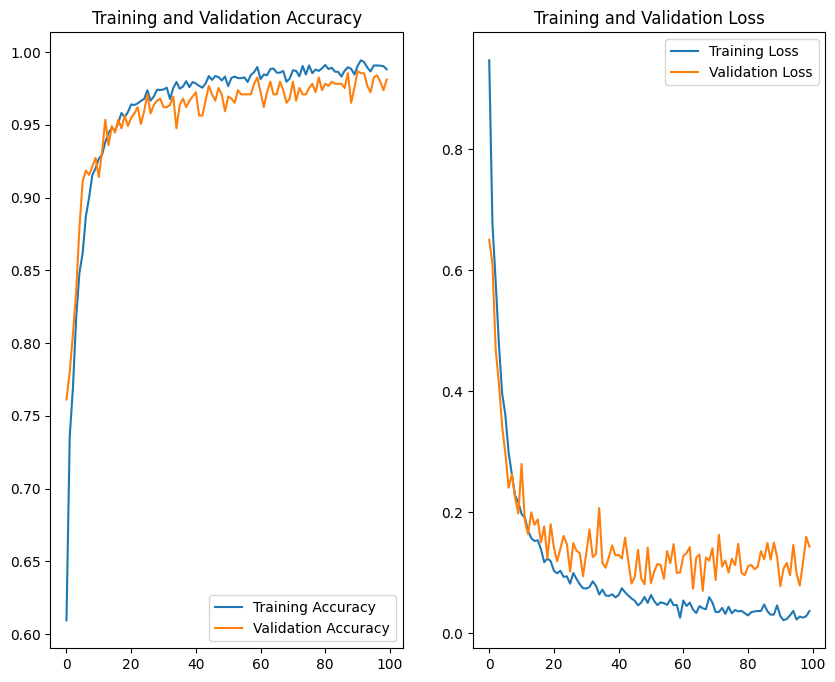

In [20]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(range(100), acc, label='Training Accuracy')
plt.plot(range(100), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(100), loss, label='Training Loss')
plt.plot(range(100), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


In [38]:
import numpy as np

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predictions = tf.nn.softmax(predictions)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


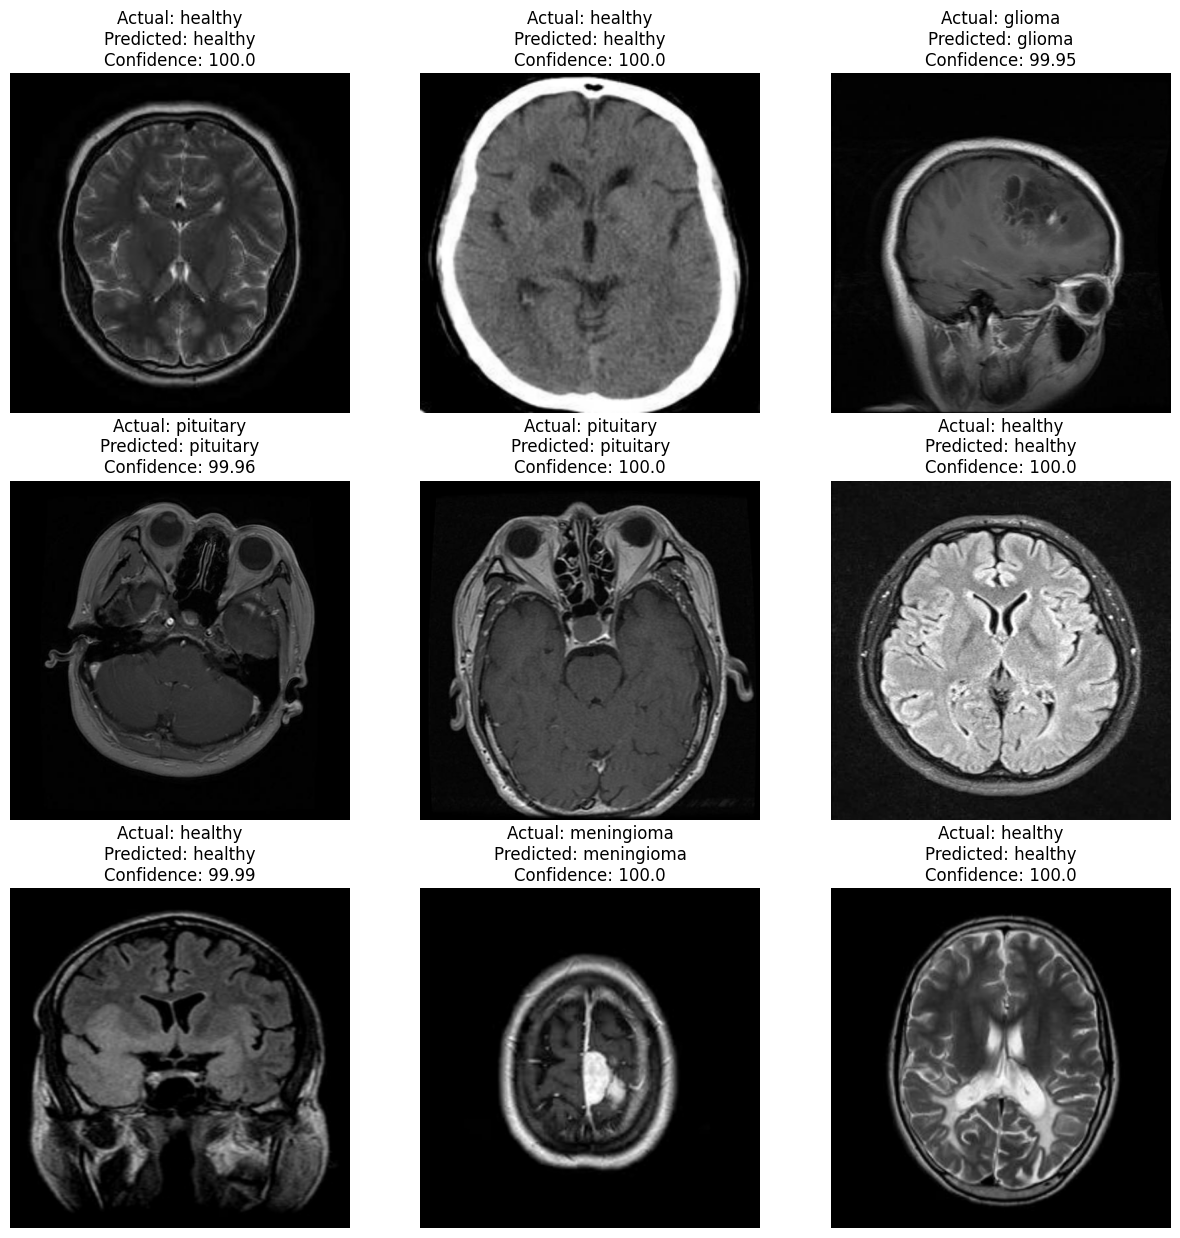

In [39]:
plt.figure(figsize=(15,15))
for images, labels in test_data.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}")
        plt.axis('off')